In [1]:
%matplotlib inline


# Feature Extraction for Classification


This notebook offers an example for how you can use PySoundTool to extract
acoustic features to train an environment or speech classifier.



Ignore this snippet of code: it is only for this example



In [2]:
import os
os.chdir('../')

Let's import pysoundtool, assuming it is in your working directory:



In [3]:
import pysoundtool as pyst

/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using TensorFlow backend.
/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of typ

# Where is your training data

PySoundTool offers example datasets. Let's use one.



In [33]:
# Example data:
data_dir = './audiodata/minidatasets/background_noise/'

# There is also a small speech dataset you can try instead:
#data_dir = './audiodata/minidatasets/speech_commands/'

## Which type of feature:

We can also extract 'fbank', 'powspec', and 'stft'

if you are working with speech, I suggest 'fbank', 'powspec', or 'stft'.

In [34]:
feature_type = 'mfcc'

how much audio in seconds used from each audio file:



In [8]:
# The example noise and speech files are only 1 second long
dur_sec = 1

# Option 1: Automatic Dataset and Feature Extraction

PySoundTool can do all of the work for you

100% through train fbank feature extraction
Features saved at audiodata/example_feats_models/envclassifier/features_fbank_6m22d2h5m50s82ms/train_data_fbank.npy

100% through val fbank feature extraction
Features saved at audiodata/example_feats_models/envclassifier/features_fbank_6m22d2h5m50s82ms/val_data_fbank.npy

100% through test fbank feature extraction
Features saved at audiodata/example_feats_models/envclassifier/features_fbank_6m22d2h5m50s82ms/test_data_fbank.npy


Finished! Total duration: 3.6 seconds.


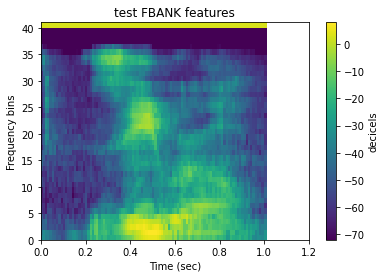

In [35]:
extraction_dir = pyst.envclassifier_feats(data_dir, feature_type=feature_type, dur_sec=dur_sec,
                                         visualize=True, vis_every_n_frames = 50)

In [36]:
print(extraction_dir)

audiodata/example_feats_models/envclassifier/features_fbank_6m22d2h5m50s82ms


# Option 2: You can do it a bit more manually

## Prepare for Extraction: Data Organization

Where to save extracted features:



In [6]:
data_features_dir = './audiodata/example_feats_models/classifier/'

create unique directory for feature extraction session:



In [9]:
feat_extraction_dir = 'features_'+feature_type + '_' + pyst.utils.get_date()

Ensure data directories exist 
and turn into pathlib.PosixPath object:



In [10]:
data_dir = pyst.utils.check_dir(data_dir, make=False)

collect labels associated with the audio data



In [11]:
# the labels are expected to be the titles of subfolders
labels = []
for label in data_dir.glob('*/'):
    labels.append(label.stem)
labels = set(labels)
print(labels)

{'train', 'street', 'cafe'}


create directory for what we need to save:



In [12]:
data_features_dir = pyst.utils.check_dir(data_features_dir, make=True)
feat_extraction_dir = data_features_dir.joinpath(feat_extraction_dir)
feat_extraction_dir = pyst.utils.check_dir(feat_extraction_dir, make=True)

dictionaries containing encoding and decoding labels:



In [13]:
dict_encode_path = feat_extraction_dir.joinpath('dict_encode.csv')
dict_decode_path = feat_extraction_dir.joinpath('dict_decode.csv')
# dictionary for which audio paths are assigned to which labels:
dict_encdodedlabel2audio_path = feat_extraction_dir.joinpath('dict_encdodedlabel2audio.csv')

designate where to save train, val, and test data



In [14]:
data_train_path = feat_extraction_dir.joinpath('{}_data_{}.npy'.format('train',
                                                                    feature_type))
data_val_path = feat_extraction_dir.joinpath('{}_data_{}.npy'.format('val',
                                                                    feature_type))
data_test_path = feat_extraction_dir.joinpath('{}_data_{}.npy'.format('test',
                                                                    feature_type))

create and save encoding/decoding labels dicts



In [15]:
dict_encode, dict_decode = pyst.data.create_dicts_labelsencoded(labels)
dict_encode_path = pyst.utils.save_dict(dict_encode, 
                                    filename = dict_encode_path,
                                    overwrite=False)
dict_decode_path = pyst.utils.save_dict(dict_encode, 
                                    filename = dict_decode_path,
                                    overwrite=False)

save audio paths to each label in dict 



In [16]:
paths_list = pyst.utils.collect_audiofiles(data_dir, recursive=True)
paths_list = sorted(paths_list)

dict_encodedlabel2audio = pyst.data.create_encodedlabel2audio_dict(dict_encode,
                                                    paths_list)
dict_encdodedlabel2audio_path = pyst.utils.save_dict(dict_encodedlabel2audio, 
                                        filename = dict_encdodedlabel2audio_path, overwrite=False)

/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/pysoundtool/data.py:400: UserWarning: Some files did not match those acceptable by this program. (i.e. non-audio files) The number of files removed: 3
  warnings.warn(message)


assign audiofiles into train, validation, and test datasets



In [17]:
train, val, test = pyst.data.audio2datasets(dict_encdodedlabel2audio_path,
                                            perc_train=0.8,
                                            limit=None,
                                            seed=40)

save audiofiles for each dataset to dict and save



In [18]:
dataset_dict = dict([('train',train),('val', val),('test',test)])
dataset_dict_path = feat_extraction_dir.joinpath('dataset_audiofiles.csv')
dataset_dict_path = pyst.utils.save_dict(dataset_dict, dataset_dict_path, 
                                        overwrite=True)

save paths to where extracted features of each dataset will be saved to dict w same keys



In [19]:
datasets_path2save_dict = dict([('train',data_train_path),
                                ('val', data_val_path),
                                ('test',data_test_path)])

# Visualize Audio Samples and Features

for fun, let's visualize the audio:



first audio sample in its raw signal



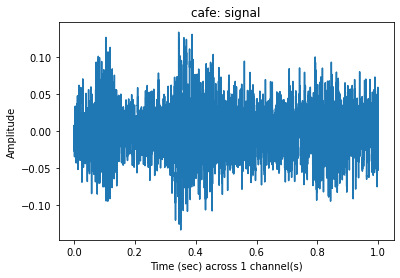

In [20]:
pyst.plotsound(paths_list[0], feature_type='signal', 
               title=paths_list[0].parent.stem+': signal')

visualize the features that will be extracted



first audio sample



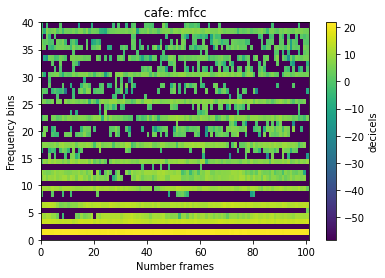

In [21]:
pyst.plotsound(paths_list[0], feature_type=feature_type, power_scale='power_to_db',
               title = paths_list[0].parent.stem+': '+feature_type)

# Extract and Save Features

In [22]:
import time
start = time.time()

exctract features:



100% through train mfcc feature extraction
Features saved at audiodata/example_feats_models/classifier/features_mfcc_6m22d1h42m24s471ms/train_data_mfcc.npy

100% through val mfcc feature extraction
Features saved at audiodata/example_feats_models/classifier/features_mfcc_6m22d1h42m24s471ms/val_data_mfcc.npy

100% through test mfcc feature extraction
Features saved at audiodata/example_feats_models/classifier/features_mfcc_6m22d1h42m24s471ms/test_data_mfcc.npy


Finished! Total duration: 6.68 seconds.

Features can be found here:
audiodata/example_feats_models/classifier/features_mfcc_6m22d1h42m24s471ms


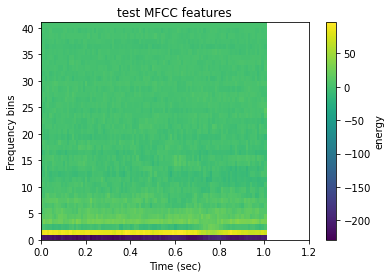

In [23]:
dataset_dict, datasets_path2save_dict = pyst.feats.save_features_datasets(
    datasets_dict = dataset_dict,
    datasets_path2save_dict = datasets_path2save_dict,
    labeled_data = True,
    feature_type = feature_type,
    dur_sec = dur_sec,
    win_size_ms = 20,
    visualize=True, # saves plots of features
    vis_every_n_frames=200) # limits how often plots are generated

end = time.time()

total_dur_sec = round(end-start,2)
total_dur, units = pyst.utils.adjust_time_units(total_dur_sec)
print('\nFinished! Total duration: {} {}.'.format(total_dur, units))
print('\nFeatures can be found here:')
print(feat_extraction_dir)

Have a look in `feat_extraction_dir` and there will be your features.



# Large Datasets

If you have very large amounts of audio you would like to process, you can 
divide the datasets into smaller sections:



In [24]:
dataset_dict, datasets_path2save_dict = pyst.feats.save_features_datasets(
    datasets_dict = dataset_dict,
    datasets_path2save_dict = datasets_path2save_dict,
    labeled_data = True,
    feature_type = feature_type,
    dur_sec = dur_sec,
    win_size_ms = 20,
    subsection_data = True, # if you want to subsection at least largest dataset
    divide_factor = 10) # how many times you want the data to be sectioned.

100% through train__1 mfcc feature extraction
Features saved at audiodata/example_feats_models/classifier/features_mfcc_6m22d1h42m24s471ms/train_data_mfcc__1.npy

100% through train__2 mfcc feature extraction
Features saved at audiodata/example_feats_models/classifier/features_mfcc_6m22d1h42m24s471ms/train_data_mfcc__2.npy

100% through train__3 mfcc feature extraction
Features saved at audiodata/example_feats_models/classifier/features_mfcc_6m22d1h42m24s471ms/train_data_mfcc__3.npy

100% through train__4 mfcc feature extraction
Features saved at audiodata/example_feats_models/classifier/features_mfcc_6m22d1h42m24s471ms/train_data_mfcc__4.npy

100% through train__5 mfcc feature extraction
Features saved at audiodata/example_feats_models/classifier/features_mfcc_6m22d1h42m24s471ms/train_data_mfcc__5.npy

100% through train__6 mfcc feature extraction
Features saved at audiodata/example_feats_models/classifier/features_mfcc_6m22d1h42m24s471ms/train_data_mfcc__6.npy

100% through train__7 